# 1. T-Test

In [1]:
# Improt modules
import pandas as pd
from scipy import stats

In [4]:
# Load data
titanic_df = pd.read_csv('./data/Titanic_data.csv')

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Create DataFrame
male_df = titanic_df[titanic_df['Sex'] == 'male']     # Only 'male' 
female_df = titanic_df[titanic_df['Sex'] == 'female'] # Only 'female'

print(male_df)
print(female_df)

     PassengerId  Survived  Pclass                            Name   Sex   
0              1         0       3         Braund, Mr. Owen Harris  male  \
4              5         0       3        Allen, Mr. William Henry  male   
5              6         0       3                Moran, Mr. James  male   
6              7         0       1         McCarthy, Mr. Timothy J  male   
7              8         0       3  Palsson, Master. Gosta Leonard  male   
..           ...       ...     ...                             ...   ...   
883          884         0       2   Banfield, Mr. Frederick James  male   
884          885         0       3          Sutehall, Mr. Henry Jr  male   
886          887         0       2           Montvila, Rev. Juozas  male   
889          890         1       1           Behr, Mr. Karl Howell  male   
890          891         0       3             Dooley, Mr. Patrick  male   

      Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    22.0      1   

In [7]:
# Calculate means
male_survival_rate = male_df['Survived'].mean()
female_survival_rate = female_df['Survived'].mean()

print('Rate of Survived Male: ', male_survival_rate)
print('Rate of Survived Female: ', female_survival_rate)


Rate of Survived Male:  0.18890814558058924
Rate of Survived Female:  0.7420382165605095


In [9]:
# T-Test
t, p = stats.ttest_ind(male_df['Survived'], 
                      female_df['Survived'])

print('t-test value: ', t)
print('p-value: ', p)

t-test value:  -19.297816550123354
p-value:  1.4060661308802591e-69


In [10]:
# Adopt or Reject Null Hypothesis

# `alpha` value
alpha = 0.05

if p < alpha:
    print(f"p-value: {p: .4f}, Null Hypothesis is rejected.")
else:
    print(f"p-value: {p: .4f}, Null Hypothesis is adopted")

p-value:  0.0000, Null Hypothesis is rejected.


# 2. Chi-Square Test

In [11]:
# Import modules
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [12]:
# Generate data
data = {
    'Gender': ['M', "M", "F", "F", "M", "F"],
    'Smoker': ["Yes", "Yes", "Yes", "No", "No", "Yes"],
    'Count': [20, 80, 40, 10, 40, 80]
}

df = pd.DataFrame(data)

df

,Gender,Smoker,Count
0,M,Yes,20
1,M,Yes,80
2,F,Yes,40
3,F,No,10
4,M,No,40
5,F,Yes,80


In [13]:
# Create a table
table = pd.pivot_table(df,
                      values='Count',
                      index='Gender',
                      columns='Smoker')

table

Smoker,No,Yes
Gender,,
F,10,60
M,40,50


In [15]:
# Chi-Square Test
stat, p, dof, expected = chi2_contingency(table)

print('stat: ', stat)
print('p: ', p)
print('Degree of Freedom: ', dof)
print('expected: ', expected)

stat:  15.295353535353534
p:  9.19423881522466e-05
Degree of Freedom:  1
expected:  [[21.875 48.125]
 [28.125 61.875]]


In [19]:
# Adopt or Reject Null Hypothesis
alpha = 0.05

if p < alpha:
    print(f"p-value: {p: .4f}, Result: Null Hypothesis is rejected.")
else:
    print(f"p-value: {p: .4f}, Result: Null Hypothesis is adopted")

p-value:  0.0001, Result: Null Hypothesis is rejected.


# 3. ANOVA

## 3.1. One-Way ANOVA

In [17]:
# Import modules
import pandas as pd
import numpy as np

In [18]:
# Generate data
np.random.seed(1)

data = {
    'A': np.random.randint(1, 6, 10),
    'B': np.random.randint(1, 6, 10),
    'C': np.random.randint(1, 6, 10)
}

df = pd.DataFrame(data)
print(df)

   A  B  C
0  4  2  5
1  5  3  2
2  1  5  2
3  2  3  1
4  4  5  2
5  1  4  2
6  1  5  2
7  2  3  2
8  5  5  1
9  5  3  5


In [20]:
# Import modules
from scipy.stats import f_oneway

In [21]:
# One-way ANOVA
f_stat, p_val = f_oneway(df['A'], df['B'], df['C'])
print('One-Way ANOVA')
print('=============')
print(f'F-statistic: {f_stat: .4f}')
print(f'p-value: {p_val: .4f}')

One-Way ANOVA
F-statistic:  2.2966
p-value:  0.1199


In [23]:
# Adopt or Reject Null Hypothesis
alpha = 0.05

if p_val < alpha:
    print(f"p-value: {p: .4f}, Result: Null Hypothesis is rejected.")
else:
    print(f"p-value: {p: .4f}, Result: Null Hypothesis is adopted")

p-value:  0.0001, Result: Null Hypothesis is adopted


## 3.2. Two-Way ANOVA

In [30]:
#Install statsmodels
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
     - -------------------------------------- 0.3/9.4 MB 6.3 MB/s eta 0:00:02
     --- ------------------------------------ 0.7/9.4 MB 7.7 MB/s eta 0:00:02
     ----- ---------------------------------- 1.2/9.4 MB 8.9 MB/s eta 0:00:01
     ------- -------------------------------- 1.8/9.4 MB 9.7 MB/s eta 0:00:01
     ---------- ----------------------------- 2.4/9.4 MB 10.1 MB/s eta 0:00:01
     ----------- ---------------------------- 2.8/9.4 MB 10.5 MB/s eta 0:00:01
     -------------- ------------------------- 3.4/9.4 MB 10.4 MB/s eta 0:00:01
     ----------------- ---------------------- 4.0/9.4 MB 10.6 MB/s eta 0:00:01
     ------------------- -------------------- 4.5/9.4 MB 11.0 MB/s eta 0:00:01
     ------------------- -------------------- 4.7/9.4 MB 11.0 MB/s eta 0:00:01
     ----------------------- ---------------- 5.5/9.4 MB 10.7 MB/

In [31]:
# Import modules
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [33]:
# Load data
titanic_df = pd.read_csv("./data/Titanic_data.csv")

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [36]:
# Generate a Two-Way ANOVA model
model = ols('Survived ~ C(Sex) + C(Pclass) + C(Sex): C(Pclass)', titanic_df).fit()

model

In [39]:
# Analysis
anova_results = anova_lm(model, typ=2)

anova_results

,sum_sq,df,F,PR(>F)
C(Sex),53.165350,1.0,368.191786,6.962809e-69
C(Pclass),15.286098,2.0,52.931238,1.934085e-22
C(Sex):C(Pclass),5.437720,2.0,18.829215,9.812394e-09
Residual,127.790290,885.0,NaN,NaN


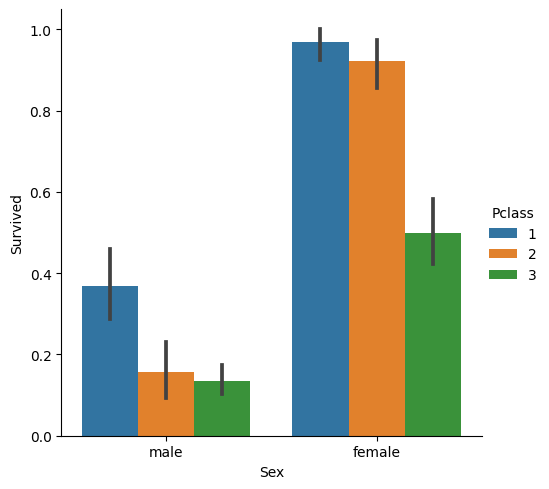

In [40]:
# Visualization
sns.catplot(x='Sex',
           y='Survived',
           hue='Pclass',
           data=titanic_df,
           kind='bar')

## 3.3. Interaction Effect

In [25]:
# Import modules
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Text(0.5, 1.0, 'Survival Rate by Sex and Pclass')

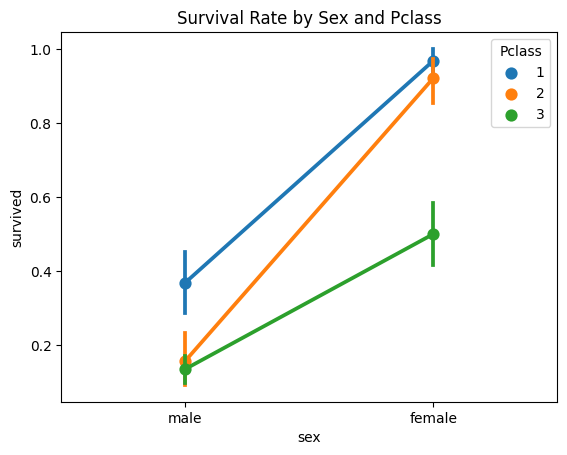

In [27]:
# Visualization: Pointplot
sns.pointplot(x='sex',
              y='survived',
              hue='pclass',
             data=titanic)

plt.legend(title='Pclass', loc='best')
plt.title('Survival Rate by Sex and Pclass')